# CONTENT-BASED FILTERING
Content-Based Filtering (CB) is one of the recommendation system.
It refers to as cognitive filtering, recommends items based on a comparison between the content of the items and a user profile. 
Content-Based uses exclusively the history of the target user. Items are described by features e.g.: actors, director, category, words in the description. Train a regression model for each of the user based on the content features.
The content of each item is represented as a set of descriptors or terms, typically the words that occur in a document. 
The user profile is represented with the same terms and built up by analyzing the content of items which have been seen by the user.

## Dataset :
The Datasets we used in this modeling is 10 movies with some features, such as :
- Movie
- Jenis Film
- Genre
- Rating
- Kode Rating
- Duration

# I. Import Libraries
To get started, let's import the libraries.

In [25]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# II. Load Data
Read data to perform recommendation system by Content-Based Filtering model by input data as 'dataCB' variable. Then, do some quick-look about data we're about to explore to understand the data itself

In [27]:
dataCB=pd.read_csv('dataCB.csv')
dataCB.head()

,Movie,Jenis Film,Genre,Rating,Kode Rating,Duration
0,Avenger End Game,Hollywood,Hero,10.0,1.000000,180
1,Twivortiare,Indonesia,Romance,8.9,0.755556,120
2,Critical Eleven,Indonesia,Romance,7.8,0.511111,130
3,Lion,Hollywood,Drama,8.5,0.666667,120
4,Friendzone,Thailand,Comedy,8.5,0.666667,130


In [28]:
dataCB.shape

(10, 6)

In [29]:
dataCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
Movie          10 non-null object
Jenis Film     10 non-null object
Genre          10 non-null object
Rating         10 non-null float64
Kode Rating    10 non-null float64
Duration       10 non-null int64
dtypes: float64(2), int64(1), object(3)
memory usage: 560.0+ bytes


# III. Content-Based Filtering Learning Method
Content-Based filtering does not involve other users if not ourselves. Based on what we like, the algorithm will simply pick items with similar content to recommend us.

In [30]:
#first, define movie as index
dataCB1=dataCB.set_index('Movie',1)

In this modeling we need to normalize the rating in order to equalize the scale by using min_max.

In [34]:
#drop the unuseful columns
dataCB2=dataCB1.drop(['Duration', 'Rating'],1)
dataCB2

,Jenis Film,Genre,Kode Rating
Movie,,,
Avenger End Game,Hollywood,Hero,1.000000
Twivortiare,Indonesia,Romance,0.755556
Critical Eleven,Indonesia,Romance,0.511111
Lion,Hollywood,Drama,0.666667
Friendzone,Thailand,Comedy,0.666667
Suckseed,Thailand,Drama,0.133333
Extreme Job,Korean,Comedy,0.533333
Exit,Korean,Thriller,0.000000
Iron Man,Hollywood,Hero,0.288889


In [35]:
#get_dummies the data
dataCB3=pd.get_dummies(dataCB2)
dataCB3

,Kode Rating,Jenis Film_Hollywood,Jenis Film_Indonesia,Jenis Film_Korean,Jenis Film_Thailand,Genre_Comedy,Genre_Drama,Genre_Hero,Genre_Romance,Genre_Thriller
Movie,,,,,,,,,,
Avenger End Game,1.000000,1,0,0,0,0,0,1,0,0
Twivortiare,0.755556,0,1,0,0,0,0,0,1,0
Critical Eleven,0.511111,0,1,0,0,0,0,0,1,0
Lion,0.666667,1,0,0,0,0,1,0,0,0
Friendzone,0.666667,0,0,0,1,1,0,0,0,0
Suckseed,0.133333,0,0,0,1,0,1,0,0,0
Extreme Job,0.533333,0,0,1,0,1,0,0,0,0
Exit,0.000000,0,0,1,0,0,0,0,0,1
Iron Man,0.288889,1,0,0,0,0,0,1,0,0


To do filtering, in this method we need to know how the similarity between features is to provide film recommendations to the user. <br>
**Cosine similarity** is a metric used to measure how similar the documents are irrespective of their size. Mathematically, it measures the cosine of the angle between two vectors projected in a multi-dimensional space.

In [36]:
SM=cosine_similarity(dataCB3,dataCB3)
SM

array([[1.        , 0.27206095, 0.19623745, 0.61545745, 0.24618298,
        0.05419278, 0.20372663, 0.        , 0.91552843, 0.99994431],
       [0.27206095, 1.        , 0.98966799, 0.20093033, 0.20093033,
        0.04423122, 0.16627818, 0.        , 0.09431167, 0.26798541],
       [0.19623745, 0.98966799, 1.        , 0.14493096, 0.14493096,
        0.03190396, 0.11993638, 0.        , 0.06802697, 0.19329777],
       [0.61545745, 0.20093033, 0.14493096, 1.        , 0.18181818,
        0.49029426, 0.15046209, 0.        , 0.52845714, 0.61450464],
       [0.24618298, 0.20093033, 0.14493096, 0.18181818, 1.        ,
        0.49029426, 0.57363671, 0.        , 0.08534091, 0.2424951 ],
       [0.05419278, 0.04423122, 0.03190396, 0.49029426, 0.49029426,
        1.        , 0.03312154, 0.        , 0.01878627, 0.05338096],
       [0.20372663, 0.16627818, 0.11993638, 0.15046209, 0.57363671,
        0.03312154, 1.        , 0.46783715, 0.07062314, 0.20067476],
       [0.        , 0.        , 0.       

In [42]:
content_based=pd.DataFrame(SM,index=dataCB3.index,columns=dataCB3.index)
content_based

Movie,Avenger End Game,Twivortiare,Critical Eleven,Lion,Friendzone,Suckseed,Extreme Job,Exit,Iron Man,Spiderman
Movie,,,,,,,,,,
Avenger End Game,1.000000,0.272061,0.196237,0.615457,0.246183,0.054193,0.203727,0.000000,0.915528,0.999944
Twivortiare,0.272061,1.000000,0.989668,0.200930,0.200930,0.044231,0.166278,0.000000,0.094312,0.267985
Critical Eleven,0.196237,0.989668,1.000000,0.144931,0.144931,0.031904,0.119936,0.000000,0.068027,0.193298
Lion,0.615457,0.200930,0.144931,1.000000,0.181818,0.490294,0.150462,0.000000,0.528457,0.614505
Friendzone,0.246183,0.200930,0.144931,0.181818,1.000000,0.490294,0.573637,0.000000,0.085341,0.242495
Suckseed,0.054193,0.044231,0.031904,0.490294,0.490294,1.000000,0.033122,0.000000,0.018786,0.053381
Extreme Job,0.203727,0.166278,0.119936,0.150462,0.573637,0.033122,1.000000,0.467837,0.070623,0.200675
Exit,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.467837,1.000000,0.000000,0.000000
Iron Man,0.915528,0.094312,0.068027,0.528457,0.085341,0.018786,0.070623,0.000000,1.000000,0.919723


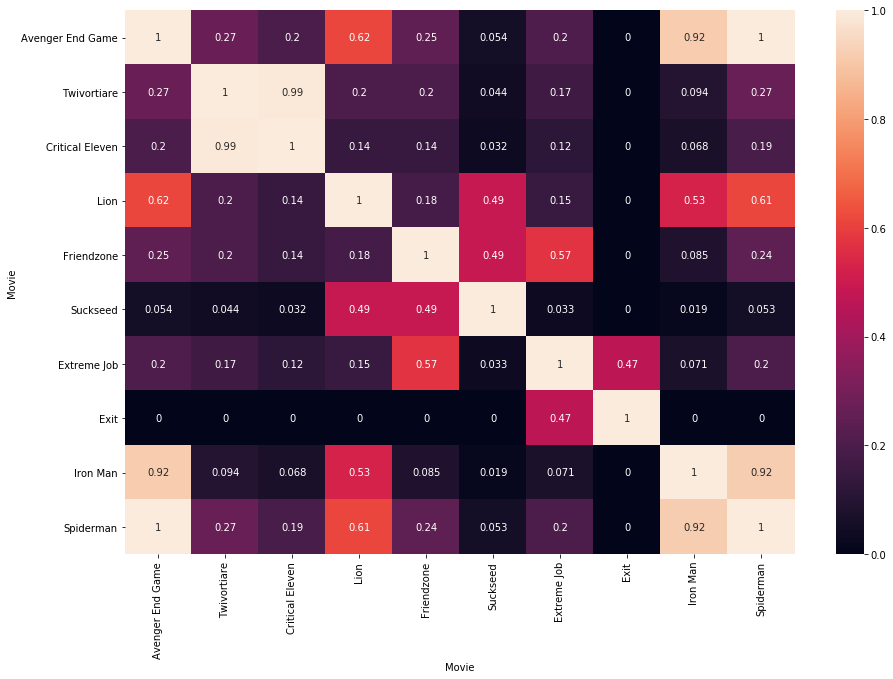

In [49]:
plt.figure(figsize=(15,10))
sns.heatmap(content_based,annot=True)

# IV. Results

In [43]:
#Result_1
recommendation=pd.DataFrame(content_based.iloc[:,9].sort_values(ascending=False))[1:].head(3)
recommendation

,Spiderman
Movie,
Avenger End Game,0.999944
Iron Man,0.919723
Lion,0.614505


In [52]:
#Result_2
recommendation=pd.DataFrame(content_based.iloc[:,1].sort_values(ascending=False))[1:].head(3)
recommendation

,Twivortiare
Movie,
Critical Eleven,0.989668
Avenger End Game,0.272061
Spiderman,0.267985


# V. Conclusion

By using normalization with 'dataCB.csv', we can see that Content-Based Filtering can be used as learning method for recommendation system. So, when a friend asks for a movie recommendation, we need to ask what kinds of movies they like. From there, we could think of a few titles that are similar to the things they’ve liked in the past. This process of recommending content based on its characteristics or features is content-based filtering.<br>
From the result above, it means that : 
- Result_1 <br>
  For someone who likes the movie **Spiderman** will be recommended to watch movie with highest order of recommendation is:
  1. Avenger End Game, which is 0.999944
  2. Iron Man, which is 0.919723
  3. Lion, which is 0.614505
  
The result is because the film **Spiderman** has a very close similarity to **Avenger End Game** which is 99% based on the Cosine Similarity score, and so on.

- Result_2 <br>
  For someone who likes the movie **Twivortiare** will be recommended to watch movie with highest order of recommendation is:
  1. Critical Eleven, which is 0.989668
  2. Avenger End Game, which is 0.999944
  2. Iron Man, which is 0.272061
  3. Spiderman, which is 0.267985
  
The result is because the film **Twivortiare** has a very close similarity to **Critical Eleven** which is 98% based on the Cosine Similarity score, and so on.

